<div style="background-color:black;border-radius:50px 0px;">
    <p style="font-size:40px;color:white; padding:40px; margin-left:15%;font-weight:bolder;">Prévisions des prix du logement</p>
</div>

<div class="alert alert-danger">
<p style="font-weight:bold;">Les détails et les interpretations sont dans le rapport !<p>
</div>

<div >
   <p style = "font-weight:bold; font-size:22px;"> importer les bibliothéques </p>
   <ul>
      <li><span style = "font-weight:bold;">Pandas      : </span> Manipulation des données </li>
      <li><span style = "font-weight:bold;">Matplotlib  :</span> Visualisations</li>
      <li><span style = "font-weight:bold;">statsmodels :</span> Création des modéles </li>
      <li><span style = "font-weight:bold;">Seaborn :</span> Visualisations </li>
       <li><span style = "font-weight:bold;">StandardScaler :</span> standariser les données </li>
      <li><span style = "font-weight:bold;">train_test_split :</span> Diviser notre dataset en train et test sets </li>
       <li><span style = "font-weight:bold;">statsmodels :</span> Pour créer le modèle </li>
   </ul>
</div>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:39%;font-weight:bolder;">Data loading</p>
</div>

In [24]:
df = pd.read_csv("USA_Housing.csv")

<p style = "font-size:20px;padding-bottom:10px"> Les 5 premières lignes </p>

In [25]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:39%;font-weight:bolder;">Data cleaning</p>
</div>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px">2- vérification des valeurs manquantes</p>

In [26]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<p style="font-size:20px;padding-bottom:10px;padding-top:10px">3- vérification des valeurs doublantes</p>

In [27]:
df.duplicated().sum()

0

<p style="font-size:20px;padding-bottom:10px;padding-top:10px">4- vérifier les types des colonnes</p>

In [28]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

<p style="font-size:20px;padding-bottom:10px;padding-top:10px">5- Vérification des outliers</p>

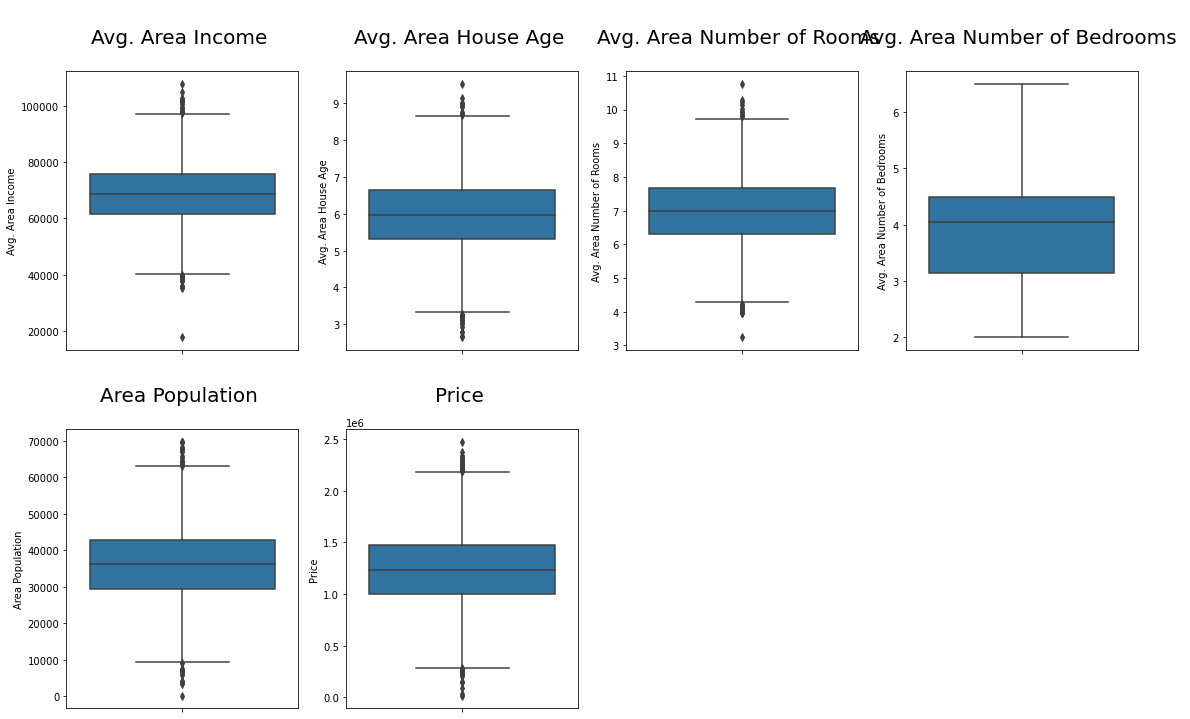

In [29]:
cols = ["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population","Price"]

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 6:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:35%;font-weight:bolder;">Feature engineering</p>
</div>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px">1- dimensions du dataset</p>

In [30]:
df.shape

(5000, 7)

<p style="font-size:20px;padding-bottom:10px;padding-top:10px">2- statistiques récapitulatives</p>

In [31]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<p style="font-size:20px;padding-bottom:10px;" >On va supprimer la colonne <strong>"Address"</strong></p>
<p>parce que nous n'en avons pas besoin dans notre étude</p>

In [32]:
df.drop(['Address'],axis=1,inplace=True)

<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:30%;font-weight:bolder;">Data analysis - Visualisation
</div>


<span style = " font-size:30px;font-weight:bold;">1.   Scatter-Plot</span>
<ul>
    <li><p style="font-size:17px">Pour voir la correlation entre les variables descriptives et la variable cible</p></li>
</ul>



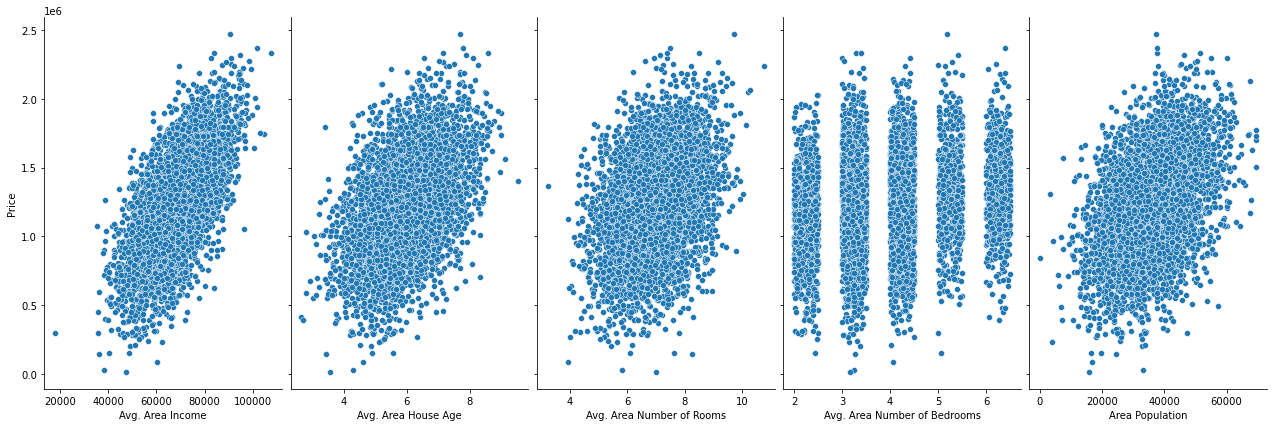

In [33]:
sns.pairplot(df, x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'], y_vars='Price',height=6, aspect=0.6, kind='scatter')

<span style = " font-size:30px; font-weight:bold;padding-top:10px">2.  Heat-map</span>
<ul>
    <li><p style="font-size:17px">Pour voir les mesures du correlation entre les variables descriptives et la variable cible</p></li>
</ul>

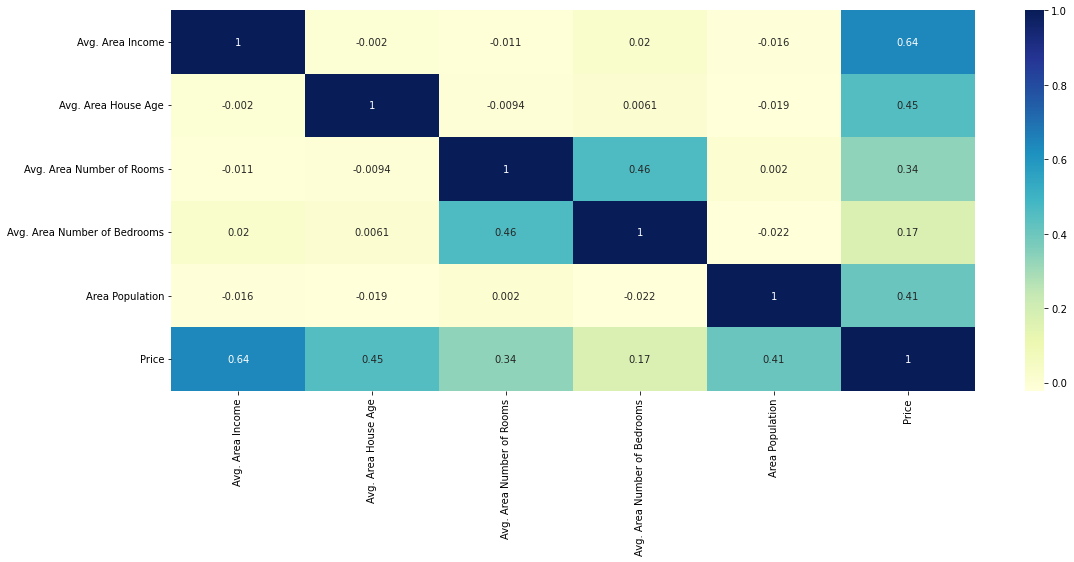

In [34]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

<span style = " font-size:30px; font-weight:bold;padding-top:10px">3. Histogrammes</span>
<ul>
    <li><p style="font-size:17px">Pour voir la distribution de chaque variable</p></li>
</ul>

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Count'>

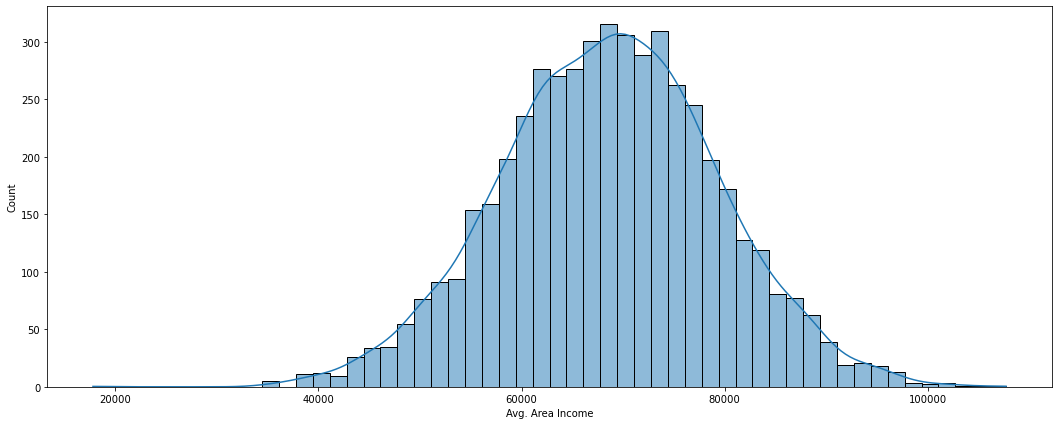

In [35]:
plt.figure(figsize = (18, 7))
sns.histplot(df["Avg. Area Income"],kde = True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

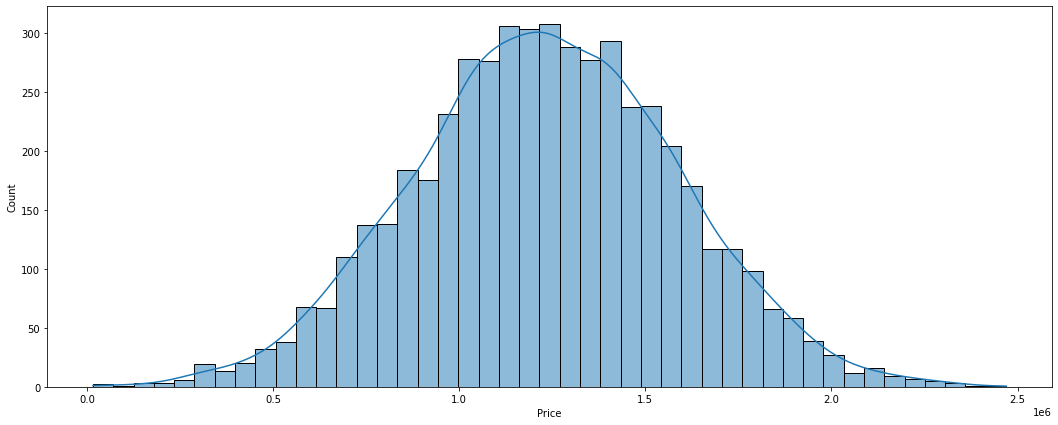

In [36]:
plt.figure(figsize = (18, 7))
sns.histplot(df["Price"],kde = True)

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Count'>

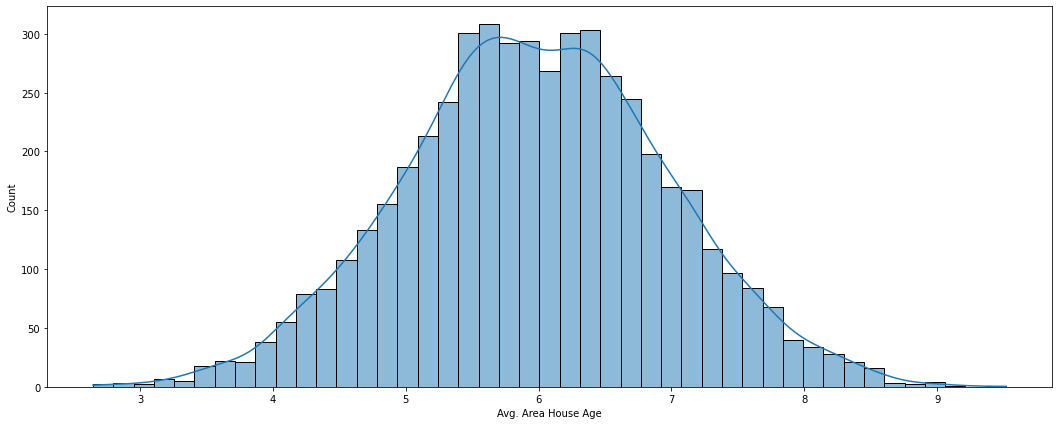

In [37]:
plt.figure(figsize = (18, 7))
sns.histplot(df["Avg. Area House Age"],kde = True)

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Count'>

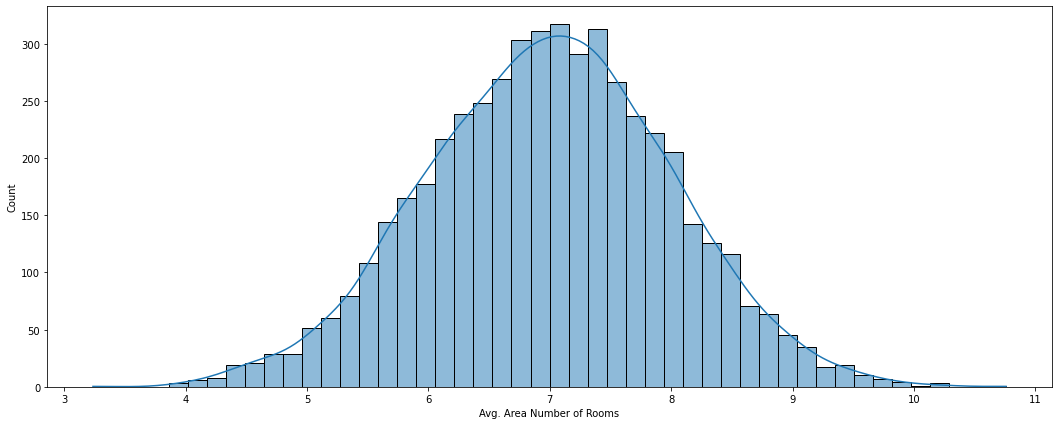

In [38]:
plt.figure(figsize = (18, 7))
sns.histplot(df["Avg. Area Number of Rooms"],kde = True)

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Count'>

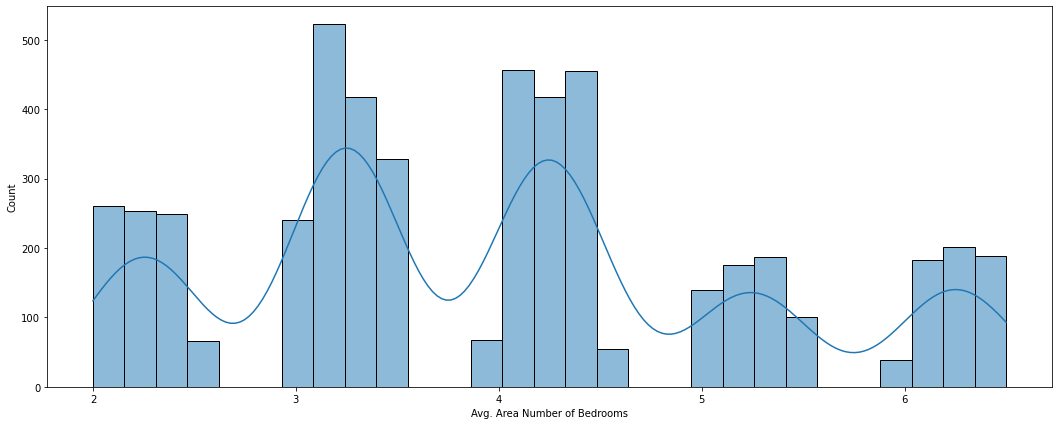

In [39]:
plt.figure(figsize = (18, 7))
sns.histplot(df["Avg. Area Number of Bedrooms"],kde = True)

<AxesSubplot:xlabel='Area Population', ylabel='Count'>

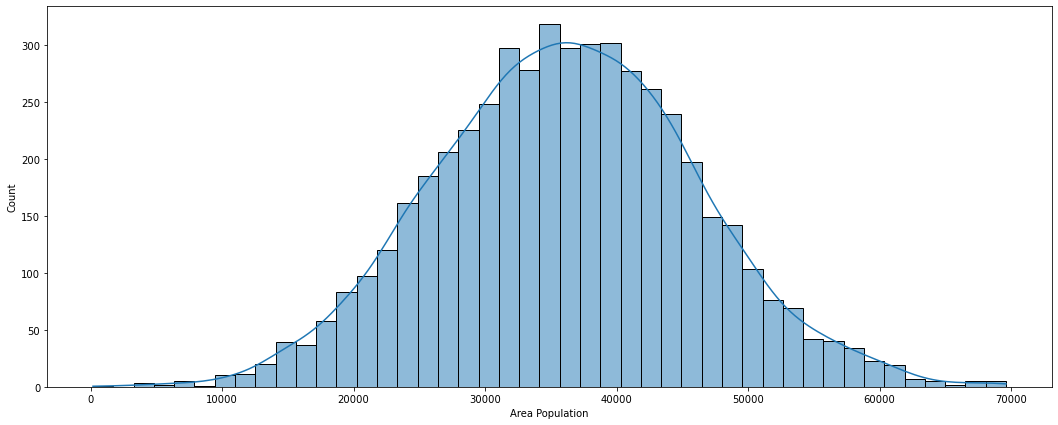

In [40]:
plt.figure(figsize = (18, 7))
sns.histplot(df["Area Population"],kde = True)

<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:35%;font-weight:bolder;">Création du modèle
</div>


<span style = " font-size:20px; font-weight:bold;padding-top:10px">1. Standariser les données.</span>

In [41]:
df_train , df_test = train_test_split(df, train_size=0.7 ,test_size = 0.3, random_state=2)

In [42]:
X_train = df_train[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population','Avg. Area Number of Bedrooms']]
y_train = df_train['Price']

In [43]:
scaler = StandardScaler().fit(X_train)

In [44]:
X_train_stand = scaler.transform(X_train)

In [45]:
X_test = df_test[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population','Avg. Area Number of Bedrooms']]
y_test = df_test['Price']

In [46]:
X_test_stand = scaler.transform(X_test)

<span style = " font-size:20px; font-weight:bold;padding-top:10px">2. Création du modèle.</span>

In [47]:
X_train_lm = sm.add_constant(X_train_stand)
lr1 = sm.OLS(y_train, X_train_lm).fit()

<ul>
    <li><p>Obtenir les paramétres du modéle:  $$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$</p></li>
</ul>



In [48]:
lr1.params

const    1.231455e+06
x1       2.301567e+05
x2       1.644490e+05
x3       1.202534e+05
x4       1.514681e+05
x5       2.993028e+03
dtype: float64

In [49]:
X_test_ = sm.add_constant(X_test_stand)
y_pred = lr1.predict(X_test_)

<ul>
    <li>Calcule de R<sup>2</sup> et R<sup>2</sup> <sub>adj</sub></li>
</ul>


In [50]:
from sklearn.metrics import r2_score  
R_squared = r2_score(y_test, y_pred)
print('Coefficient de détérmination = %.3f'%R_squared)   
R_squared_adjusted = 1-(1-R_squared)*((len(X_test)-1)/(len(X_test)-len(X_test.iloc[0])-1))
print('Coefficient de détérmination ajusté = %.3f'%R_squared_adjusted)

Coefficient de détérmination = 0.920
Coefficient de détérmination ajusté = 0.920


<ul>
    <li>Calcule de MSE</li>
</ul>

In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)


9831074697.740435


<span style = " font-size:20px; font-weight:bold;padding-top:10px">3. Visualisation des resultats.</span>

Text(0, 0.5, 'Housing Price')

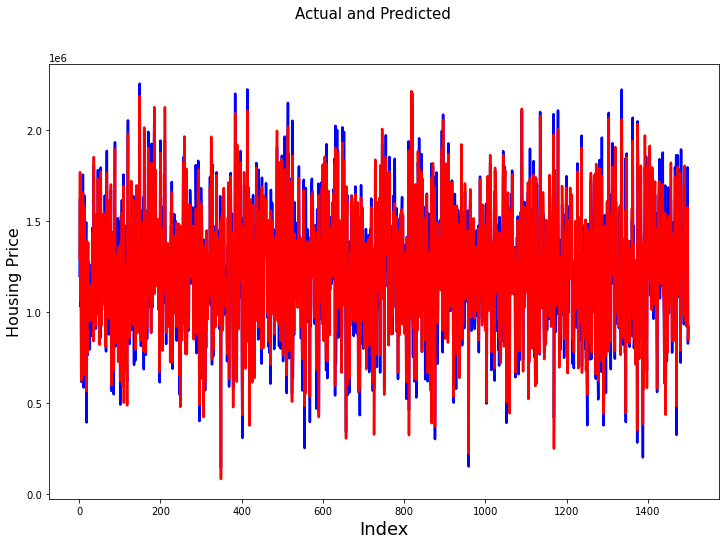

In [53]:
c = [i for i in range(1,1501,1)] 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") 
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") 
fig.suptitle('Actual and Predicted', fontsize=15)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Housing Price', fontsize=16)   

<span style = " font-size:20px; font-weight:bold;padding-top:10px">4. Les résidus.</span>

In [63]:
résidus = [y_test-y_pred]

In [64]:
résidus

[3566    -97290.329986
 4252   -145449.884570
 1918    -29244.800621
 4111     85047.097938
 1471     -8231.679968
             ...      
 570       6077.489820
 4853     33391.872358
 768     217977.698445
 2085    -17400.771860
 4836     12336.307956
 Name: Price, Length: 1500, dtype: float64]

<AxesSubplot:ylabel='Count'>

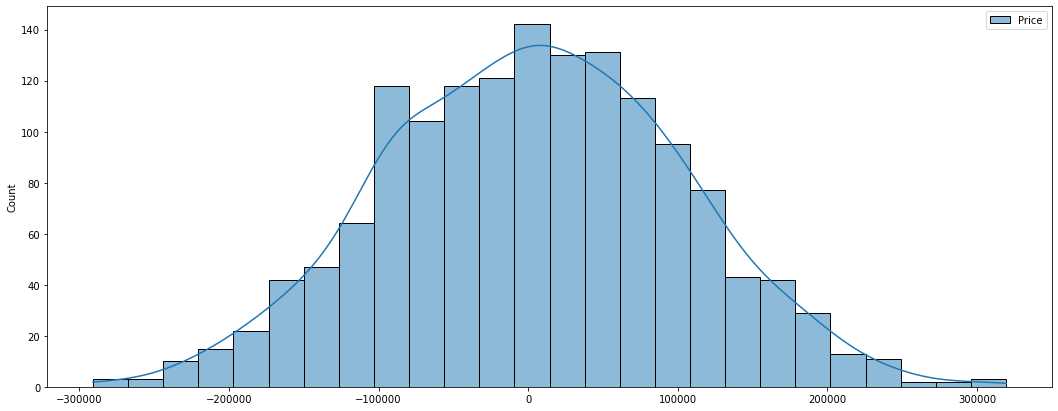

In [66]:
plt.figure(figsize = (18, 7))
sns.histplot(résidus,kde = True)

<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:40%;font-weight:bolder;">Test d'hypothèse</p>
</div>

In [67]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     7739.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:26:00   Log-Likelihood:                -45329.
No. Observations:                3500   AIC:                         9.067e+04
Df Residuals:                    3494   BIC:                         9.071e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.231e+06   1724.526    714.083      0.0

<p style ="font-size:20px">On a la p-value de la t-calculée de x5 superieur a 0.05 . Donc on accepte H0 : B5 = 0 au seuil de 0.05</p>

<ul>
    <li style ="font-size:16px;">On élimine l'attribut  'Avg. Area Number of Bedrooms' et on réestime de modèle .</li>
</ul>

In [68]:
X_train1 = df_train[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]
y_train1 = df_train['Price']

In [69]:
scaler1 = StandardScaler().fit(X_train1)

In [70]:
X_train_stand1 = scaler1.transform(X_train1)

In [71]:
X_test1 = df_test[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]
y_test1 = df_test['Price']

In [72]:
X_test_stand1 = scaler1.transform(X_test1)

In [73]:
X_train_lm1 = sm.add_constant(X_train_stand1)
lr2 = sm.OLS(y_train1, X_train_lm1).fit()

<ul>
    <li><p>les nouveaux paramétres du modéle:</li>
</ul>

In [74]:
lr2.params

const    1.231455e+06
x1       2.301965e+05
x2       1.644585e+05
x3       1.216284e+05
x4       1.513951e+05
dtype: float64

In [77]:
X_test_lm1 = sm.add_constant(X_test_stand1)
y_pred1 = lr2.predict(X_test_lm1)

<ul>
    <li>Calcule les nouveaux  R<sup>2</sup> et R<sup>2</sup> <sub>adj</sub></li>
</ul>

In [78]:
from sklearn.metrics import r2_score  
R_squared1 = r2_score(y_test1, y_pred1)
print('Coefficient de détérmination = %.3f'%R_squared1)   
R_squared_adjusted1 = 1-(1-R_squared1)*((len(X_test1)-1)/(len(X_test1)-len(X_test1.iloc[0])-1))
print('Coefficient de détérmination ajusté = %.3f'%R_squared_adjusted1)

Coefficient de détérmination = 0.920
Coefficient de détérmination ajusté = 0.920


<ul>
    <li>Calcule le nouveau MSE</li>
</ul>

In [79]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test1, y_pred1)
print(mse1)

9823431323.317665


<span style = " font-size:20px; font-weight:bold;padding-top:10px">Visualisation des resultats.</span>

Text(0, 0.5, 'Housing Price')

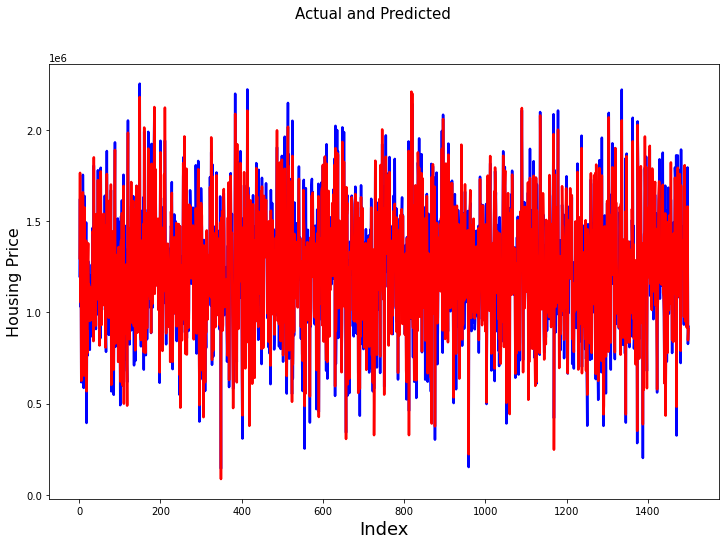

In [80]:
c = [i for i in range(1,1501,1)] 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test1, color="blue", linewidth=2.5, linestyle="-") 
plt.plot(c,y_pred1, color="red",  linewidth=2.5, linestyle="-") 
fig.suptitle('Actual and Predicted', fontsize=15)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Housing Price', fontsize=16)  

<span style = " font-size:20px; font-weight:bold;padding-top:10px">Les résidus</span>

In [82]:
résidus1 = [y_test1-y_pred1]

<AxesSubplot:ylabel='Count'>

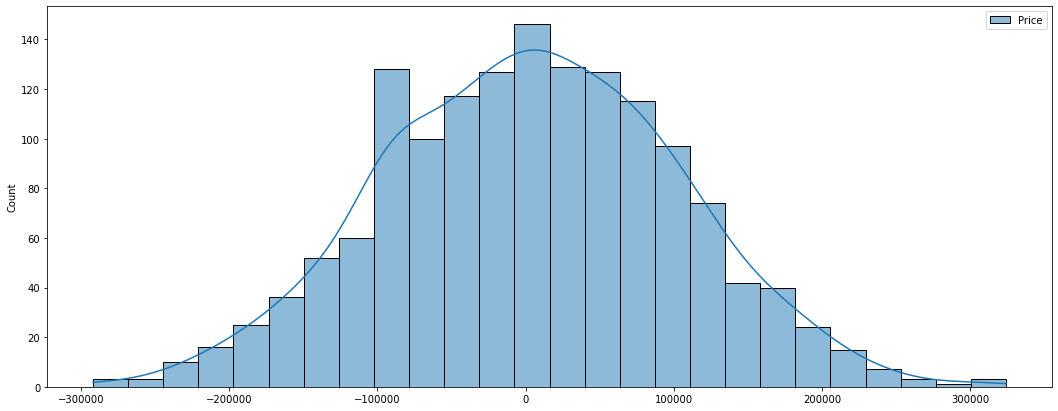

In [83]:
plt.figure(figsize = (18, 7))
sns.histplot(résidus1,kde = True)

<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:47%;font-weight:bolder;">Fin</p>
</div>

<div style = "background-color:#E9E9E9;padding:10px;display:inline-block;border-radius:10px;">
  <p style ="font-size:20px;font-weight:bold;">Made by : </p>
  <ul>
      <li>ELASRAOUI Badreddine</li>
      <li>EL JABIRY Reda</li>
      <li>EDDAOU M'hammed Issam</li>
  </ul>
</div>